In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

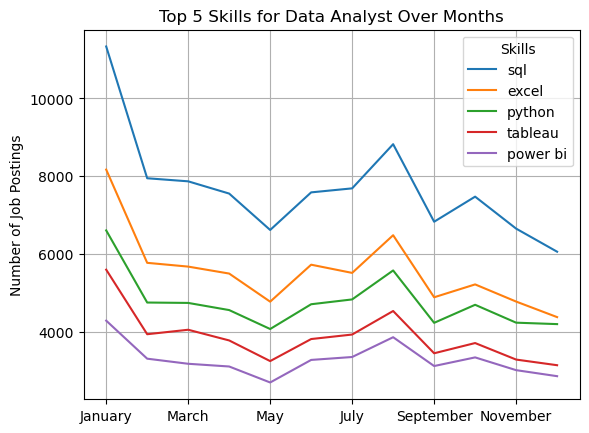

In [8]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month  # extract month number

df_DA_exploded = df_DA.explode('job_skills') # explode the list in job_skills column
# create a pivot table to count occurrences of each skill per month
# fill_value=0 to replace NaN with 0
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# sum the occurrences of each skill across all months
# loc to add a new row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum() 
# sort the columns based on the total occurrences in descending order
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total') # drop the Total row

# use month names for plotting
# enhance the month number to month name
df_DA_pivot = df_DA_pivot.reset_index() # reset index to make job_posted_month_no a column
# convert month number to month name, example: 1 -> January
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
# set job_posted_month as index
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
# drop job_posted_month_no column
df_DA_pivot = df_DA_pivot.drop(columns=['job_posted_month_no'])
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analyst Over Months')
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.legend(title='Skills')
plt.grid()
plt.show()

In [9]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


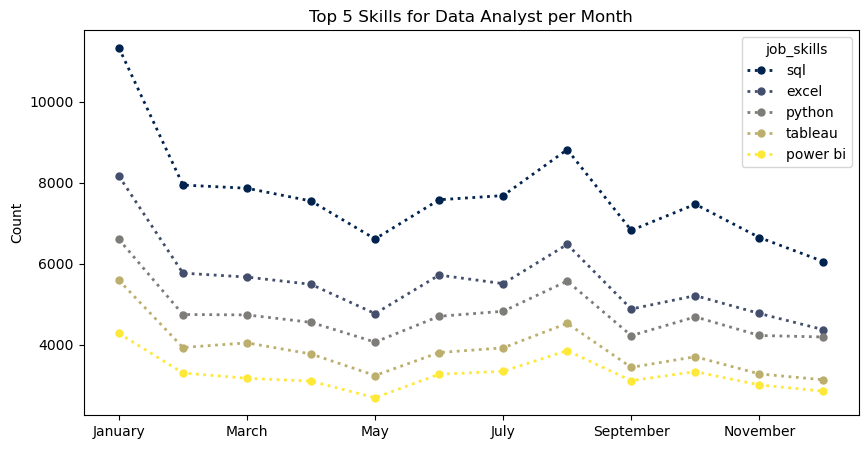

In [57]:
df_DA_pivot.iloc[:,:5].plot(
  kind='line',
  linewidth=2,
  linestyle=':', # options: '-', '--', '-.', ':'
  colormap='cividis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' or look at https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png
  marker='o', # option: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4',...
  markersize=5,
  figsize=(10, 5)
)

plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [5]:
df_DA_exploded = df_DA.explode('job_skills')

skill_count = 20

skill_stats = df_DA_exploded.groupby('job_skills').agg(
  median_salary=('salary_year_avg', 'median'),
  skill_count=('job_skills', 'count')
).sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


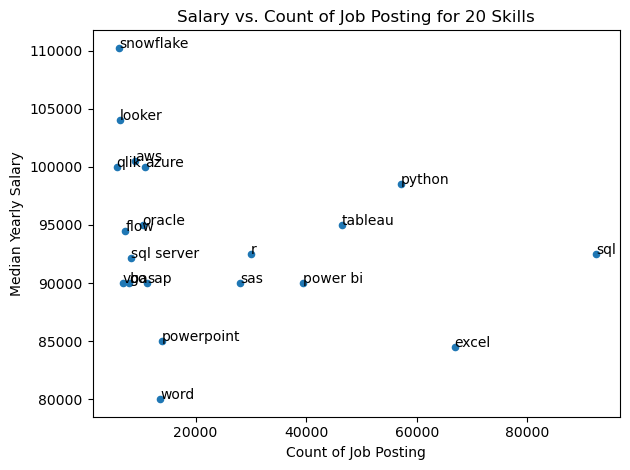

In [62]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel("Count of Job Posting")
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Posting for 20 Skills')

for i, txt in enumerate(skill_stats.index):
  # print(i, txt)
  plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()

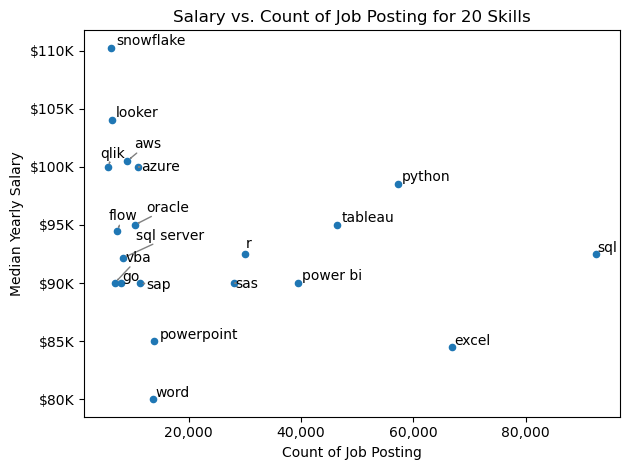

In [24]:
from adjustText import adjust_text
# import matplotlib.ticker as mtick

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel("Count of Job Posting")
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Posting for 20 Skills')

texts = []

for i, txt in enumerate(skill_stats.index):
  texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# get current axis
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# format x-axis with commas
# ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
plt.tight_layout()
plt.show()